Selected year for plotting: 2022


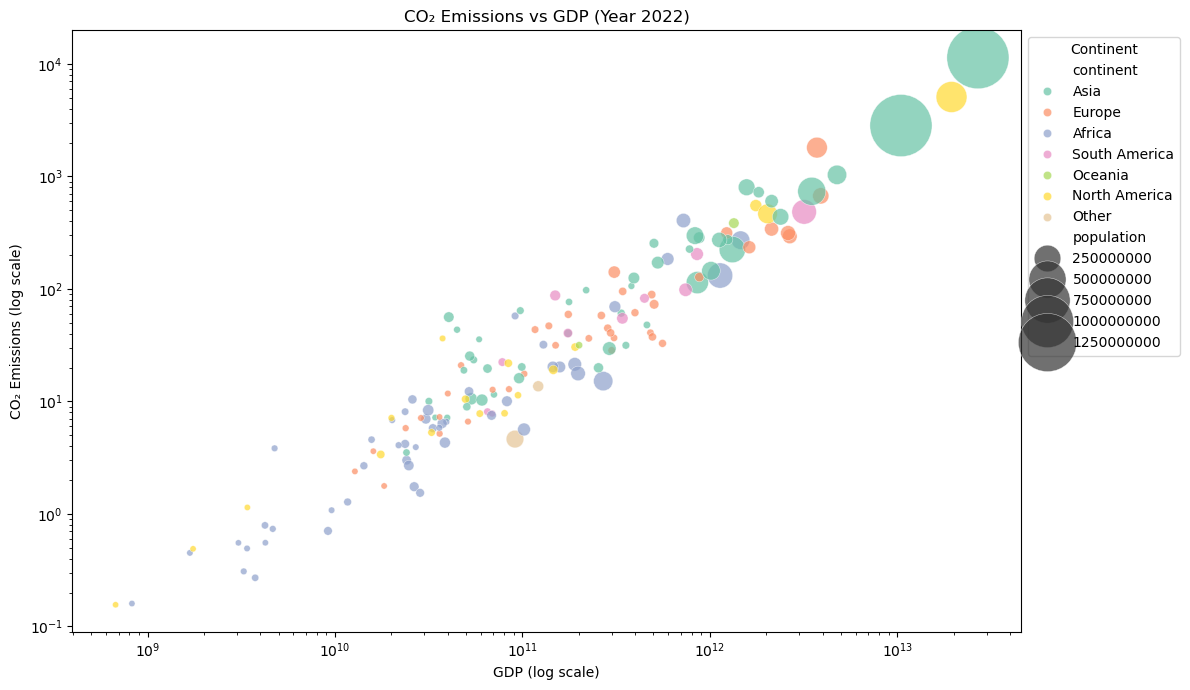

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc

# Load data
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

# Keep only country-level data (iso_code length == 3)
df = df[df['iso_code'].apply(lambda x: isinstance(x, str) and len(x) == 3)]

# Filter rows with positive gdp, co2, and population
valid_data = df[(df['gdp'] > 0) & (df['co2'] > 0) & (df['population'] > 0)]

# Find the year with the maximum number of valid rows
valid_counts = valid_data.groupby('year').size().reset_index(name='count')
best_year = valid_counts.sort_values('count', ascending=False).iloc[0]['year']
print(f"Selected year for plotting: {int(best_year)}")

# Filter data for that best year
latest_df = valid_data[valid_data['year'] == best_year].copy()

# Function to map country name to continent
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return 'Other'

# Add continent column
latest_df['continent'] = latest_df['country'].apply(country_to_continent)

# Plot scatterplot
plt.figure(figsize=(12,7))
sns.scatterplot(data=latest_df, x='gdp', y='co2', size='population',
                hue='continent', alpha=0.7, sizes=(20, 2000), palette='Set2')
plt.xscale('log')
plt.yscale('log')
plt.title(f'CO₂ Emissions vs GDP (Year {int(best_year)})')
plt.xlabel('GDP (log scale)')
plt.ylabel('CO₂ Emissions (log scale)')
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()
